In [192]:
!pip install scikit-learn -q

!pip install matplotlib -q

import warnings
warnings.filterwarnings("ignore")

!pip install pandas -q
import pandas as pd
# Хак чтобы работало на Anaconda под MacOs 10.15.7 Catalina
pd.DataFrame.iteritems = pd.DataFrame.items

from utils.config import COMMON_CONFIG
from utils.data import train_test_split

ticker = COMMON_CONFIG.SYMBOL.replace('/', '')
X_csv = COMMON_CONFIG.DATA_PATH + COMMON_CONFIG.SYMBOL.replace('/', '_') + '_' + COMMON_CONFIG.TIMEFRAME + '_X_features.csv'


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [193]:
import os
os.environ['CUBLAS_WORKSPACE_CONFIG'] = ':4096:8'

import random
import numpy as np

def seed_everything(seed: int = COMMON_CONFIG.SEED) -> None:
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    print(f"Using {seed} seed")

# Зафиксируем SEED
seed_everything(COMMON_CONFIG.SEED)

Using 777 seed


In [194]:
from utils.files import read_data_from_file

df = read_data_from_file(COMMON_CONFIG.DATA_PATH, COMMON_CONFIG.SYMBOL, COMMON_CONFIG.TIMEFRAME)
df

,open,high,low,close,volume
date,,,,,
2020-01-01 00:00:00,129.16,129.19,128.68,128.87,7769.17336
2020-01-01 01:00:00,128.87,130.65,128.78,130.64,11344.65516
2020-01-01 02:00:00,130.63,130.98,130.35,130.85,7603.35623
2020-01-01 03:00:00,130.85,130.89,129.94,130.20,4968.55433
2020-01-01 04:00:00,130.21,130.74,130.15,130.20,3397.90747
...,...,...,...,...,...
2025-01-26 16:00:00,3315.31,3320.00,3307.96,3315.82,6878.43040
2025-01-26 17:00:00,3315.83,3344.88,3315.36,3338.04,9465.04360
2025-01-26 18:00:00,3338.03,3342.92,3334.02,3337.16,8731.04880


In [195]:
!pip install tsfresh -q

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.utilities.dataframe_functions import impute


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [196]:
df_melted = pd.DataFrame()
df_melted["timestamp"] = df.index
df_melted["close"] = df['close'].values
df_melted['symbol'] = ticker
df_melted

,timestamp,close,symbol
0,2020-01-01 00:00:00,128.87,ETHUSDT
1,2020-01-01 01:00:00,130.64,ETHUSDT
2,2020-01-01 02:00:00,130.85,ETHUSDT
3,2020-01-01 03:00:00,130.20,ETHUSDT
4,2020-01-01 04:00:00,130.20,ETHUSDT
...,...,...,...
44430,2025-01-26 16:00:00,3315.82,ETHUSDT
44431,2025-01-26 17:00:00,3338.04,ETHUSDT
44432,2025-01-26 18:00:00,3337.16,ETHUSDT
44433,2025-01-26 19:00:00,3338.74,ETHUSDT


In [197]:
# df_rolled = roll_time_series(df_melted, column_id="symbol", column_sort="timestamp",
#                              min_timeshift=COMMON_CONFIG.TS_FRESH_MIN_WINDOW_SIZE,
#                              max_timeshift=COMMON_CONFIG.TS_FRESH_MAX_WINDOW_SIZE)
# df_rolled

In [198]:
# X = extract_features(df_rolled.drop("symbol", axis=1), 
#                      column_id="id", column_sort="timestamp", column_value="close", 
#                      impute_function=impute, show_warnings=False)
# X = X.set_index(X.index.map(lambda x: x[1]), drop=True)
# X.index.name = "last_timestamp"
# X

In [199]:
# X.to_csv(X_csv)

In [200]:
X = pd.read_csv(X_csv)
X["last_timestamp"] = pd.to_datetime(X["last_timestamp"])
X.set_index('last_timestamp', inplace=True)
X

,close__variance_larger_than_standard_deviation,close__has_duplicate_max,close__has_duplicate_min,close__has_duplicate,close__sum_values,close__abs_energy,close__mean_abs_change,close__mean_change,close__mean_second_derivative_central,close__median,...,close__fourier_entropy__bins_5,close__fourier_entropy__bins_10,close__fourier_entropy__bins_100,close__permutation_entropy__dimension_3__tau_1,close__permutation_entropy__dimension_4__tau_1,close__permutation_entropy__dimension_5__tau_1,close__permutation_entropy__dimension_6__tau_1,close__permutation_entropy__dimension_7__tau_1,close__query_similarity_count__query_None__threshold_0.0,close__mean_n_absolute_max__number_of_maxima_7
last_timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 05:00:00,0.0,0.0,0.0,1.0,781.06,1.016782e+05,0.546000,0.286000,-0.208750,130.25,...,1.039721,1.386294,1.386294,1.039721,1.098612,0.693147,-0.000000,3.982128,0.0,1916.527143
2020-01-01 06:00:00,0.0,0.0,0.0,1.0,911.50,1.186928e+05,0.478333,0.261667,-0.163000,130.30,...,1.386294,1.386294,1.386294,0.950271,1.386294,1.098612,0.693147,-0.000000,0.0,1916.527143
2020-01-01 07:00:00,0.0,0.0,0.0,1.0,1041.74,1.356552e+05,0.438571,0.195714,-0.164167,130.27,...,0.950271,0.950271,1.609438,1.011404,1.332179,1.386294,1.098612,0.693147,0.0,130.410000
2020-01-01 08:00:00,0.0,0.0,0.0,1.0,1172.10,1.526490e+05,0.398750,0.186250,-0.117857,130.30,...,1.332179,1.609438,1.609438,1.078992,1.560710,1.609438,1.386294,1.098612,0.0,130.432857
2020-01-01 09:00:00,0.0,0.0,0.0,1.0,1302.27,1.695932e+05,0.375556,0.144444,-0.122500,130.27,...,1.011404,1.329661,1.791759,1.082196,1.747868,1.791759,1.609438,1.386294,0.0,130.432857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-26 16:00:00,1.0,0.0,0.0,0.0,203536.41,6.792157e+08,10.431000,-0.293000,-0.644492,3331.18,...,0.379535,0.611952,1.344137,1.675807,2.640149,3.363593,3.793211,3.956922,0.0,3404.132857
2025-01-26 17:00:00,1.0,0.0,0.0,0.0,203541.05,6.792466e+08,9.525333,-1.198667,0.387966,3331.18,...,0.379535,0.611952,1.344137,1.661064,2.621104,3.324131,3.768455,3.956922,0.0,3404.132857
2025-01-26 18:00:00,1.0,0.0,0.0,0.0,203468.25,6.787554e+08,9.147333,-0.820667,0.040000,3331.18,...,0.379535,0.611952,1.353234,1.677865,2.598396,3.299810,3.768455,3.956922,0.0,3402.410000


In [201]:
X

,close__variance_larger_than_standard_deviation,close__has_duplicate_max,close__has_duplicate_min,close__has_duplicate,close__sum_values,close__abs_energy,close__mean_abs_change,close__mean_change,close__mean_second_derivative_central,close__median,...,close__fourier_entropy__bins_5,close__fourier_entropy__bins_10,close__fourier_entropy__bins_100,close__permutation_entropy__dimension_3__tau_1,close__permutation_entropy__dimension_4__tau_1,close__permutation_entropy__dimension_5__tau_1,close__permutation_entropy__dimension_6__tau_1,close__permutation_entropy__dimension_7__tau_1,close__query_similarity_count__query_None__threshold_0.0,close__mean_n_absolute_max__number_of_maxima_7
last_timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 05:00:00,0.0,0.0,0.0,1.0,781.06,1.016782e+05,0.546000,0.286000,-0.208750,130.25,...,1.039721,1.386294,1.386294,1.039721,1.098612,0.693147,-0.000000,3.982128,0.0,1916.527143
2020-01-01 06:00:00,0.0,0.0,0.0,1.0,911.50,1.186928e+05,0.478333,0.261667,-0.163000,130.30,...,1.386294,1.386294,1.386294,0.950271,1.386294,1.098612,0.693147,-0.000000,0.0,1916.527143
2020-01-01 07:00:00,0.0,0.0,0.0,1.0,1041.74,1.356552e+05,0.438571,0.195714,-0.164167,130.27,...,0.950271,0.950271,1.609438,1.011404,1.332179,1.386294,1.098612,0.693147,0.0,130.410000
2020-01-01 08:00:00,0.0,0.0,0.0,1.0,1172.10,1.526490e+05,0.398750,0.186250,-0.117857,130.30,...,1.332179,1.609438,1.609438,1.078992,1.560710,1.609438,1.386294,1.098612,0.0,130.432857
2020-01-01 09:00:00,0.0,0.0,0.0,1.0,1302.27,1.695932e+05,0.375556,0.144444,-0.122500,130.27,...,1.011404,1.329661,1.791759,1.082196,1.747868,1.791759,1.609438,1.386294,0.0,130.432857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-26 16:00:00,1.0,0.0,0.0,0.0,203536.41,6.792157e+08,10.431000,-0.293000,-0.644492,3331.18,...,0.379535,0.611952,1.344137,1.675807,2.640149,3.363593,3.793211,3.956922,0.0,3404.132857
2025-01-26 17:00:00,1.0,0.0,0.0,0.0,203541.05,6.792466e+08,9.525333,-1.198667,0.387966,3331.18,...,0.379535,0.611952,1.344137,1.661064,2.621104,3.324131,3.768455,3.956922,0.0,3404.132857
2025-01-26 18:00:00,1.0,0.0,0.0,0.0,203468.25,6.787554e+08,9.147333,-0.820667,0.040000,3331.18,...,0.379535,0.611952,1.353234,1.677865,2.598396,3.299810,3.768455,3.956922,0.0,3402.410000


In [202]:
y = df_melted.set_index("timestamp").sort_index().close.shift(-1)
y#.tail(3)

timestamp
2020-01-01 00:00:00     130.64
2020-01-01 01:00:00     130.85
2020-01-01 02:00:00     130.20
2020-01-01 03:00:00     130.20
2020-01-01 04:00:00     130.30
                        ...   
2025-01-26 16:00:00    3338.04
2025-01-26 17:00:00    3337.16
2025-01-26 18:00:00    3338.74
2025-01-26 19:00:00    3338.08
2025-01-26 20:00:00        NaN
Name: close, Length: 44435, dtype: float64

In [203]:
y = y[y.index.isin(X.index)]
X = X[X.index.isin(y.index)]

In [204]:
X_train, X_test = train_test_split(X)
y_train, y_test = train_test_split(y)

Train size: 35645, Test size: 8785
Train size: 35645, Test size: 8785


In [205]:
X_train_selected = select_features(X_train, y_train)
X_train_selected

,"close__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4","close__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""max""",close__has_duplicate,"close__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""var""","close__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""min""",close__max_langevin_fixed_point__m_3__r_30,close__friedrich_coefficients__coeff_3__m_3__r_30,"close__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""var""","close__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""","close__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""",...,close__large_standard_deviation__r_0.15000000000000002,"close__fft_coefficient__attr_""angle""__coeff_3",close__last_location_of_maximum,"close__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""max""","close__agg_linear_trend__attr_""rvalue""__chunk_len_50__f_agg_""min""","close__fft_coefficient__attr_""imag""__coeff_27",close__symmetry_looking__r_0.05,"close__fft_coefficient__attr_""angle""__coeff_2",close__ar_coefficient__coeff_8__k_10,close__ratio_beyond_r_sigma__r_0.5
last_timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 05:00:00,0.002500,-15.28,1.0,-8.278069,22.81,1923.669441,1.470729e+05,-456.484034,0.000000,0.000000,...,1.0,180.000000,0.500000,-1.000000,1.0,0.505260,1.0,172.060521,-0.000161,0.500000
2020-01-01 06:00:00,0.000000,-15.28,1.0,-8.278069,22.81,1923.669441,1.470729e+05,-456.484034,0.000000,0.000000,...,1.0,166.900823,0.428571,-1.000000,1.0,0.505260,1.0,178.840705,-0.000161,0.428571
2020-01-01 07:00:00,0.000000,-15.28,1.0,-8.278069,22.81,1923.669441,1.470729e+05,-456.484034,0.000000,0.000000,...,1.0,172.944497,0.375000,-1.000000,1.0,0.505260,1.0,-167.307334,-0.000161,0.375000
2020-01-01 08:00:00,0.000000,-15.28,1.0,-8.278069,22.81,1923.669441,1.470729e+05,-456.484034,0.000000,0.000000,...,1.0,168.215840,0.333333,-1.000000,1.0,0.505260,1.0,-158.470449,-0.000161,0.333333
2020-01-01 09:00:00,0.000000,-15.28,1.0,-8.278069,22.81,1923.669441,1.470729e+05,-456.484034,0.000000,0.000000,...,1.0,178.754931,0.300000,-1.000000,1.0,0.505260,1.0,-150.110771,-0.000161,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-26 15:00:00,4.873558,1.76,0.0,1.482571,11.47,2242.468377,5.906806e+05,275.669075,1.166143,1.442313,...,1.0,-116.418757,0.983607,0.064335,1.0,-10.216863,1.0,-6.070751,-0.122580,0.639344
2024-01-26 16:00:00,7.726327,23.35,0.0,10.414555,11.47,2251.687246,-1.118630e+06,451.780807,1.240876,1.652420,...,1.0,-59.359066,1.000000,0.255240,1.0,31.293837,1.0,8.106010,0.012475,0.622951
2024-01-26 17:00:00,11.574441,23.35,0.0,24.675966,11.47,2259.739209,6.323468e+05,472.064738,1.343418,1.685229,...,1.0,-20.413129,0.983607,0.371027,1.0,-29.020189,1.0,17.925480,0.065998,0.590164


In [206]:
from pickle import dump
with open("pipeline/selected_columns.pkl", "wb") as f:
    dump(X_train_selected.columns, f, protocol=5)

In [207]:
X_test_selected = X_test[X_train_selected.columns]
X_test_selected

,"close__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4","close__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""max""",close__has_duplicate,"close__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""var""","close__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""min""",close__max_langevin_fixed_point__m_3__r_30,close__friedrich_coefficients__coeff_3__m_3__r_30,"close__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""var""","close__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""","close__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""",...,close__large_standard_deviation__r_0.15000000000000002,"close__fft_coefficient__attr_""angle""__coeff_3",close__last_location_of_maximum,"close__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""max""","close__agg_linear_trend__attr_""rvalue""__chunk_len_50__f_agg_""min""","close__fft_coefficient__attr_""imag""__coeff_27",close__symmetry_looking__r_0.05,"close__fft_coefficient__attr_""angle""__coeff_2",close__ar_coefficient__coeff_8__k_10,close__ratio_beyond_r_sigma__r_0.5
last_timestamp,,,,,,,,,,,,,,,,,,,,,
2024-01-26 20:00:00,11.574441,23.35,0.0,-3.255365,51.60,2261.033520,6.211258e+05,-55.566185,1.435681,1.575432,...,1.0,35.013750,0.934426,0.320247,1.0,29.509538,1.0,45.600775,0.098663,0.622951
2024-01-26 21:00:00,11.574441,23.35,0.0,-9.409052,54.89,2259.379938,6.992154e+05,-94.539619,1.259196,1.474973,...,1.0,49.418854,0.918033,0.363651,1.0,-15.921281,1.0,54.381617,0.190700,0.622951
2024-01-26 22:00:00,11.574441,23.35,0.0,-13.952383,54.89,2286.463460,4.521764e+05,-106.958022,1.347029,1.668740,...,1.0,62.157268,0.901639,0.499285,1.0,10.579388,1.0,62.168946,0.186471,0.590164
2024-01-26 23:00:00,11.574441,25.53,0.0,-16.849339,54.89,2260.729693,8.373656e+05,-109.862245,1.330569,1.566651,...,1.0,77.637903,0.885246,0.551219,1.0,0.172252,0.0,72.282120,0.196113,0.590164
2024-01-27 00:00:00,11.574441,26.16,0.0,-16.947035,71.90,2294.062290,6.430209e+05,-132.019667,1.339153,1.706068,...,1.0,87.897995,1.000000,0.615601,1.0,1.804384,0.0,78.567500,0.250976,0.590164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-26 16:00:00,33.837336,-71.55,0.0,-109.330846,24.53,3380.982585,2.329114e+06,-1341.672477,2.166490,2.444942,...,1.0,-135.975103,0.114754,-0.690439,1.0,-17.375791,1.0,-105.036979,0.061171,0.622951
2025-01-26 17:00:00,33.837336,-74.84,0.0,-102.407373,24.53,3372.807013,2.259270e+06,-1356.516128,2.291019,2.655503,...,1.0,-117.662821,0.098361,-0.586297,1.0,-4.111686,1.0,-92.998455,-0.067243,0.622951
2025-01-26 18:00:00,25.544856,-75.36,0.0,-109.274356,24.53,3381.856282,1.341919e+06,-1265.341503,2.095038,2.500532,...,1.0,-110.758060,0.081967,-0.586616,1.0,-0.609814,1.0,-84.992879,-0.047429,0.606557


In [208]:
from sklearn.utils import all_estimators

from utils.functions import init_regressors, get_best_regressor

# Choose whether to look for a best regression model, or use a pre-saved one from a previous run, alternatively you can choose your own regression method.
init = 0                  # do not (0) or (1) calculate the best regressor
best_regressor = ''       # you can choose a regressor here

# Choose to see the best_regressor calculations in verbose mode
verbose = 0

test_start = X_test_selected.index.min()
test_start

Timestamp('2024-01-26 20:00:00')

In [209]:
if init == 1:
    init_regressors(ticker)

In [210]:
# For cleaner output we suppress warnings that occur during testing of the estimators
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=FutureWarning)
simplefilter("ignore", category=RuntimeWarning)
simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=UserWarning)

# Check and proceed if init=1 or no best_regressor was found
if init == 1:

    # Create a list for regressors with too bad performance
    new_removed_regressors = []
    removed_regressors = pd.DataFrame()

    # Calculate all the estimator metrics
    MAE, MSE, RMSE, R2, removed_regressors, new_removed_regressors = get_best_regressor(X_train_selected, X_test,y_train, y, test_start, ticker, verbose)

    # Write the results to this file
    with open(f'regressor_min_mae_{ticker}.csv', 'w') as f:
        f.write(min(MAE, key=MAE.get))

    # Define the best estimator by chosing the one with the smallest MAE
    best_regressor = min(MAE, key=MAE.get)

    # Create a dataframe with the excluded estimators and write it to a file, so we can exclude them in future runs 
    if new_removed_regressors != 'None':
        new_removed_regressors = pd.DataFrame(new_removed_regressors, columns=['name'])
        removed_regressors = pd.concat([removed_regressors, new_removed_regressors])
        removed_regressors.to_csv(f'removed_regressors_{ticker}.csv', 'a', index=False)

    # Load the estimator model and store its name
    estimators = all_estimators()
    for est_name, estimator in estimators:
        if str(best_regressor) == est_name:
            best_regressor = estimator()
            name = est_name
    
    # Print out the five best estimators
    df_best_regressors = pd.DataFrame.from_dict({'MAE': MAE, 'RMSE': RMSE, 'R2_score': R2})
    df_best_regressors = df_best_regressors.sort_values(by="MAE", ascending=True).head().reset_index()
    df_styled = df_best_regressors.style.apply(lambda x: ['background-color: lightgreen' if x.name == 0 else '' for i in x], axis=1)
    df_best_regressors.to_csv(COMMON_CONFIG.DATA_PATH + 'tsfresh_best_regressors.csv', index=False)
    display(df_styled)

In [211]:
df_best_regressors = pd.read_csv(COMMON_CONFIG.DATA_PATH + 'tsfresh_best_regressors.csv')
df_best_regressors

,index,MAE,RMSE,R2_score
0,ElasticNet,14.366080,21.994040,0.997916
1,Lasso,14.369626,21.998660,0.997915
2,BayesianRidge,14.369629,22.002205,0.997914
3,RANSACRegressor,14.421495,22.076280,0.997900
4,Ridge,14.464137,22.107482,0.997894


In [212]:
estimators = {}
for est_name, estimator in all_estimators():    
    estimators[est_name] = estimator

best_regressors = {}
for regressor in df_best_regressors['index']:
    best_regressors[regressor] = estimators[regressor]()

best_regressors

{'ElasticNet': ElasticNet(),
 'Lasso': Lasso(),
 'BayesianRidge': BayesianRidge(),
 'RANSACRegressor': RANSACRegressor(),
 'Ridge': Ridge()}

In [213]:
from sklearn.ensemble import VotingRegressor

voting_regressor = VotingRegressor(estimators=list(best_regressors.items()))
voting_regressor.fit(X_train_selected, y_train)

VotingRegressor(estimators=[('ElasticNet', ElasticNet()), ('Lasso', Lasso()),
                            ('BayesianRidge', BayesianRidge()),
                            ('RANSACRegressor', RANSACRegressor()),
                            ('Ridge', Ridge())])

In [214]:
from pickle import dump
with open("pipeline/model.pkl", "wb") as f:
     dump(voting_regressor, f, protocol=5)

In [215]:
from pickle import load
with open("pipeline/model.pkl", "rb") as f:
    voting_regressor_from_file = load(f)

In [216]:
predictions_df = pd.DataFrame(voting_regressor_from_file.predict(X_test_selected), index=X_test_selected.index, columns=['MLPredictions'])
predictions_df = predictions_df.shift(-1).dropna()
predictions_df

,MLPredictions
last_timestamp,
2024-01-26 20:00:00,2259.126866
2024-01-26 21:00:00,2267.238999
2024-01-26 22:00:00,2267.840258
2024-01-26 23:00:00,2281.200771
2024-01-27 00:00:00,2269.284025
...,...
2025-01-26 15:00:00,3312.488642
2025-01-26 16:00:00,3337.630602
2025-01-26 17:00:00,3335.926005


In [217]:
bt_best_params_test_data = pd.read_csv(COMMON_CONFIG.BT_BEST_PARAMS_TA_TEST_DATA_FILE)
bt_best_params_test_data.set_index('Datetime', inplace=True)
bt_best_params_test_data

,Open,High,Low,Close,Volume,Signal
Datetime,,,,,,
2024-01-26 20:00:00,2258.51,2262.69,2252.49,2258.60,11646.5910,0
2024-01-26 21:00:00,2258.60,2260.87,2253.00,2259.87,6455.0093,0
2024-01-26 22:00:00,2259.86,2272.00,2258.01,2268.01,6966.3637,0
2024-01-26 23:00:00,2268.01,2270.27,2263.99,2267.68,7176.1758,0
2024-01-27 00:00:00,2267.67,2280.31,2265.23,2280.18,12034.2632,0
...,...,...,...,...,...,...
2025-01-26 16:00:00,3315.31,3320.00,3307.96,3315.82,6878.4304,0
2025-01-26 17:00:00,3315.83,3344.88,3315.36,3338.04,9465.0436,0
2025-01-26 18:00:00,3338.03,3342.92,3334.02,3337.16,8731.0488,0


In [218]:
bt_best_params_test_data = pd.concat([bt_best_params_test_data.reset_index(), predictions_df.reset_index(drop=True)], axis=1)
bt_best_params_test_data["Datetime"] = pd.to_datetime(bt_best_params_test_data["Datetime"])
bt_best_params_test_data.set_index('Datetime', inplace=True)
bt_best_params_test_data = bt_best_params_test_data.dropna()
bt_best_params_test_data

,Open,High,Low,Close,Volume,Signal,MLPredictions
Datetime,,,,,,,
2024-01-26 20:00:00,2258.51,2262.69,2252.49,2258.60,11646.5910,0,2259.126866
2024-01-26 21:00:00,2258.60,2260.87,2253.00,2259.87,6455.0093,0,2267.238999
2024-01-26 22:00:00,2259.86,2272.00,2258.01,2268.01,6966.3637,0,2267.840258
2024-01-26 23:00:00,2268.01,2270.27,2263.99,2267.68,7176.1758,0,2281.200771
2024-01-27 00:00:00,2267.67,2280.31,2265.23,2280.18,12034.2632,0,2269.284025
...,...,...,...,...,...,...,...
2025-01-26 15:00:00,3311.09,3320.68,3308.74,3315.31,7303.5872,0,3312.488642
2025-01-26 16:00:00,3315.31,3320.00,3307.96,3315.82,6878.4304,0,3337.630602
2025-01-26 17:00:00,3315.83,3344.88,3315.36,3338.04,9465.0436,0,3335.926005



[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


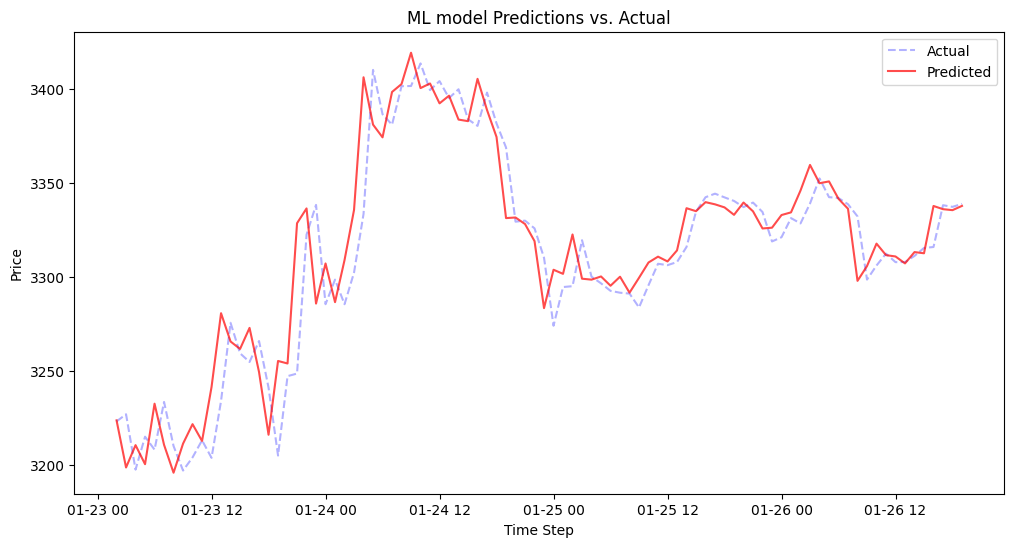

In [219]:
!pip install plotly -q

from utils.plots import plot

all_predictions = bt_best_params_test_data['MLPredictions']
all_targets = bt_best_params_test_data['Close']
plot(all_predictions[-90:], all_targets[-90:], "ML model Predictions vs. Actual")

In [220]:
!pip install tsfresh -q

from tsfresh import extract_features, select_features
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.utilities.dataframe_functions import impute


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [221]:
!pip install ccxt -q

from utils.config import COMMON_CONFIG
from utils.api import get_data_from_api
from utils.files import save_data_to_file


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [249]:
from datetime import datetime, timedelta, timezone

current_time = datetime.now(timezone.utc)
start_date = (current_time - timedelta(days=7)).isoformat()

print('Start date', start_date)

Start date 2025-01-26T16:19:08.966907+00:00


In [250]:
df_for_predict = get_data_from_api(COMMON_CONFIG.SYMBOL, COMMON_CONFIG.TIMEFRAME, start_date)
df_for_predict.columns = ['date','open','high','low','close','volume']
df_for_predict = df_for_predict.sort_values(by='date')
df_for_predict = df_for_predict.drop_duplicates(subset='date').reset_index(drop=True)
df_for_predict['date'] = pd.to_datetime(df_for_predict['date'], unit='ms')
df_for_predict.set_index('date', inplace=True)
# Удалим значения где нет объемов
df_for_predict = df_for_predict.drop(df_for_predict[df_for_predict['volume']==0.0].index)
#save_data_to_file(df_for_predict, COMMON_CONFIG.DATA_PATH, COMMON_CONFIG.SYMBOL, COMMON_CONFIG.TIMEFRAME, 'predict')
df_for_predict

Fetched 168 ETH/USDT 1h candles from 2025-01-26T17:00:00.000Z
Sleep for 0.05
Fetched 168 ETH/USDT 1h candles in total


,open,high,low,close,volume
date,,,,,
2025-01-26 17:00:00,3315.83,3344.88,3315.36,3338.04,9465.0436
2025-01-26 18:00:00,3338.03,3342.92,3334.02,3337.16,8731.0488
2025-01-26 19:00:00,3337.17,3341.95,3329.62,3338.74,7563.7282
2025-01-26 20:00:00,3338.73,3342.34,3327.23,3329.67,5989.0255
2025-01-26 21:00:00,3329.68,3330.00,3291.35,3296.45,15535.9718
...,...,...,...,...,...
2025-02-02 12:00:00,3064.87,3080.39,3050.64,3052.39,41132.0816
2025-02-02 13:00:00,3052.40,3088.13,3052.40,3087.47,22373.8455
2025-02-02 14:00:00,3087.47,3101.92,3082.23,3087.07,25861.5024


In [224]:
df = df_for_predict.copy()
df_melted = pd.DataFrame()
df_melted["timestamp"] = df.index
df_melted["close"] = df['close'].values
df_melted['symbol'] = ticker
df_melted

,timestamp,close,symbol
0,2025-01-26 16:00:00,3315.82,ETHUSDT
1,2025-01-26 17:00:00,3338.04,ETHUSDT
2,2025-01-26 18:00:00,3337.16,ETHUSDT
3,2025-01-26 19:00:00,3338.74,ETHUSDT
4,2025-01-26 20:00:00,3329.67,ETHUSDT
...,...,...,...
163,2025-02-02 11:00:00,3064.86,ETHUSDT
164,2025-02-02 12:00:00,3052.39,ETHUSDT
165,2025-02-02 13:00:00,3087.47,ETHUSDT
166,2025-02-02 14:00:00,3087.07,ETHUSDT


In [226]:
df_rolled = roll_time_series(df_melted, column_id="symbol", column_sort="timestamp",
                             min_timeshift=COMMON_CONFIG.TS_FRESH_MIN_WINDOW_SIZE,
                             max_timeshift=COMMON_CONFIG.TS_FRESH_MAX_WINDOW_SIZE)
df_rolled

Rolling: 100%|██████████| 34/34 [00:02<00:00, 14.26it/s]


,timestamp,close,symbol,id
0,2025-01-26 16:00:00,3315.82,ETHUSDT,"(ETHUSDT, 2025-01-26 21:00:00)"
1,2025-01-26 17:00:00,3338.04,ETHUSDT,"(ETHUSDT, 2025-01-26 21:00:00)"
2,2025-01-26 18:00:00,3337.16,ETHUSDT,"(ETHUSDT, 2025-01-26 21:00:00)"
3,2025-01-26 19:00:00,3338.74,ETHUSDT,"(ETHUSDT, 2025-01-26 21:00:00)"
4,2025-01-26 20:00:00,3329.67,ETHUSDT,"(ETHUSDT, 2025-01-26 21:00:00)"
...,...,...,...,...
7178,2025-02-02 11:00:00,3064.86,ETHUSDT,"(ETHUSDT, 2025-02-02 15:00:00)"
7179,2025-02-02 12:00:00,3052.39,ETHUSDT,"(ETHUSDT, 2025-02-02 15:00:00)"
7180,2025-02-02 13:00:00,3087.47,ETHUSDT,"(ETHUSDT, 2025-02-02 15:00:00)"
7181,2025-02-02 14:00:00,3087.07,ETHUSDT,"(ETHUSDT, 2025-02-02 15:00:00)"


In [227]:
X = extract_features(df_rolled.drop("symbol", axis=1), 
                     column_id="id", column_sort="timestamp", column_value="close", 
                     impute_function=impute, show_warnings=False)
X = X.set_index(X.index.map(lambda x: x[1]), drop=True)
X.index.name = "last_timestamp"
X

Feature Extraction: 100%|██████████| 33/33 [00:05<00:00,  6.46it/s]


,close__variance_larger_than_standard_deviation,close__has_duplicate_max,close__has_duplicate_min,close__has_duplicate,close__sum_values,close__abs_energy,close__mean_abs_change,close__mean_change,close__mean_second_derivative_central,close__median,...,close__fourier_entropy__bins_5,close__fourier_entropy__bins_10,close__fourier_entropy__bins_100,close__permutation_entropy__dimension_3__tau_1,close__permutation_entropy__dimension_4__tau_1,close__permutation_entropy__dimension_5__tau_1,close__permutation_entropy__dimension_6__tau_1,close__permutation_entropy__dimension_7__tau_1,close__query_similarity_count__query_None__threshold_0.0,close__mean_n_absolute_max__number_of_maxima_7
last_timestamp,,,,,,,,,,,,,,,,,,,,,
2025-01-26 21:00:00,1.0,0.0,0.0,0.0,19955.88,6.637428e+07,13.394000,-3.874000,-6.930000,3333.415,...,1.039721,1.386294,1.386294,1.386294,1.098612,0.693147,-0.000000,3.956922,0.0,3320.577143
2025-01-26 22:00:00,1.0,0.0,0.0,0.0,23244.04,7.718628e+07,12.543333,-4.610000,-3.051000,3329.670,...,1.039721,1.039721,1.386294,1.332179,1.386294,1.098612,0.693147,-0.000000,0.0,3320.577143
2025-01-26 23:00:00,1.0,0.0,0.0,0.0,26476.65,8.763604e+07,18.687143,-11.887143,-6.480833,3322.745,...,0.500402,0.950271,1.332179,1.242453,1.332179,1.386294,1.098612,0.693147,0.0,3320.577143
2025-01-27 00:00:00,1.0,0.0,0.0,0.0,29690.77,9.796661e+07,18.662500,-12.712500,-2.907857,3315.820,...,0.500402,0.500402,1.332179,1.153742,1.242453,1.332179,1.386294,1.098612,0.0,3320.577143
2025-01-27 01:00:00,1.0,0.0,0.0,0.0,32886.35,1.081783e+08,18.648889,-13.360000,-2.547500,3306.135,...,0.450561,0.450561,1.242453,1.073543,1.153742,1.242453,1.332179,1.386294,0.0,3320.577143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-02 11:00:00,1.0,0.0,0.0,0.0,197718.79,6.413131e+08,18.721833,-3.042167,-0.531525,3250.990,...,0.283936,0.283936,0.884120,1.681805,2.820563,3.610021,3.916987,4.007333,0.0,3371.741429
2025-02-02 12:00:00,1.0,0.0,0.0,0.0,197523.79,6.400846e+08,18.544500,-3.635167,-0.106780,3250.990,...,0.283936,0.283936,0.793400,1.672004,2.801569,3.600841,3.916987,4.007333,0.0,3371.741429
2025-02-02 13:00:00,1.0,0.0,0.0,0.0,197340.76,6.389209e+08,19.127000,-3.052667,0.492373,3247.610,...,0.142506,0.283936,0.838120,1.669574,2.809397,3.600841,3.916987,4.007333,0.0,3371.741429


In [228]:
from pickle import load
with open("pipeline/selected_columns.pkl", "rb") as f:
    selected_columns = load(f)

In [229]:
selected_columns

Index(['close__change_quantiles__f_agg_"var"__isabs_False__qh_0.6__ql_0.4',
       'close__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"max"',
       'close__has_duplicate',
       'close__agg_linear_trend__attr_"slope"__chunk_len_10__f_agg_"var"',
       'close__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"min"',
       'close__max_langevin_fixed_point__m_3__r_30',
       'close__friedrich_coefficients__coeff_3__m_3__r_30',
       'close__agg_linear_trend__attr_"slope"__chunk_len_50__f_agg_"var"',
       'close__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"max"',
       'close__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"min"',
       ...
       'close__large_standard_deviation__r_0.15000000000000002',
       'close__fft_coefficient__attr_"angle"__coeff_3',
       'close__last_location_of_maximum',
       'close__agg_linear_trend__attr_"rvalue"__chunk_len_5__f_agg_"max"',
       'close__agg_linear_trend__attr_"rvalue"__chunk_len_50__f_agg_"min"',
     

In [230]:
X_test_selected = X[selected_columns]
X_test_selected

,"close__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.4","close__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""max""",close__has_duplicate,"close__agg_linear_trend__attr_""slope""__chunk_len_10__f_agg_""var""","close__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""min""",close__max_langevin_fixed_point__m_3__r_30,close__friedrich_coefficients__coeff_3__m_3__r_30,"close__agg_linear_trend__attr_""slope""__chunk_len_50__f_agg_""var""","close__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""max""","close__agg_linear_trend__attr_""stderr""__chunk_len_5__f_agg_""min""",...,close__large_standard_deviation__r_0.15000000000000002,"close__fft_coefficient__attr_""angle""__coeff_3",close__last_location_of_maximum,"close__agg_linear_trend__attr_""rvalue""__chunk_len_5__f_agg_""max""","close__agg_linear_trend__attr_""rvalue""__chunk_len_50__f_agg_""min""","close__fft_coefficient__attr_""imag""__coeff_27",close__symmetry_looking__r_0.05,"close__fft_coefficient__attr_""angle""__coeff_2",close__ar_coefficient__coeff_8__k_10,close__ratio_beyond_r_sigma__r_0.5
last_timestamp,,,,,,,,,,,,,,,,,,,,,
2025-01-26 21:00:00,0.000000,-72.34,0.0,-184.313677,62.25,3337.659006,2.704715e+09,-2259.789747,0.000000,0.000000,...,1.0,0.000000,0.666667,-1.000000,1.0,0.000000,0.0,-82.476909,0.029812,0.833333
2025-01-26 22:00:00,0.000000,-72.34,0.0,-184.313677,62.25,3338.511729,-3.990564e+08,-2259.789747,0.000000,0.000000,...,1.0,146.790384,0.571429,-1.000000,1.0,0.000000,0.0,-46.874811,0.029812,0.714286
2025-01-26 23:00:00,0.000000,-72.34,0.0,-184.313677,62.25,3339.494677,-1.741786e+08,-2259.789747,0.000000,0.000000,...,1.0,-60.178241,0.500000,-1.000000,1.0,0.000000,0.0,-72.283979,0.029812,0.750000
2025-01-27 00:00:00,0.000000,-72.34,0.0,-184.313677,62.25,3333.143085,2.336214e+07,-2259.789747,0.000000,0.000000,...,1.0,-33.544083,0.444444,-1.000000,1.0,0.000000,0.0,-65.366574,0.029812,0.666667
2025-01-27 01:00:00,0.000000,-72.34,0.0,-184.313677,62.25,3339.543107,3.577800e+06,-2259.789747,0.000000,0.000000,...,1.0,-33.157044,0.400000,-1.000000,1.0,0.000000,0.0,-60.533589,0.029812,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-02 11:00:00,302.863847,-275.17,0.0,-91.234420,-52.68,3345.751035,3.118839e+05,-3516.054534,4.961686,4.075261,...,1.0,2.256112,0.278689,-0.783594,-1.0,1.576599,1.0,-126.094119,-0.165520,0.606557
2025-02-02 12:00:00,317.532482,-307.94,0.0,-57.769653,-65.15,3332.622574,2.390686e+05,-3794.057594,5.039780,4.176527,...,1.0,21.439798,0.262295,-0.796685,-1.0,-25.447684,1.0,-123.025071,-0.175627,0.606557
2025-02-02 13:00:00,272.712291,-307.94,0.0,-6.945944,-63.42,3338.498216,2.679243e+05,-4283.643269,4.900052,4.373051,...,1.0,66.906253,0.245902,-0.805976,-1.0,-18.517160,1.0,-118.905677,-0.133955,0.622951


In [231]:
from pickle import load
with open("pipeline/model.pkl", "rb") as f:
    voting_regressor_from_file = load(f)

In [232]:
predictions_df = pd.DataFrame(voting_regressor_from_file.predict(X_test_selected), index=X_test_selected.index, columns=['MLPredictions'])
predictions_df = predictions_df.shift(-1).dropna()
predictions_df

,MLPredictions
last_timestamp,
2025-01-26 21:00:00,1667.962169
2025-01-26 22:00:00,3949.913444
2025-01-26 23:00:00,2445.606826
2025-01-27 00:00:00,3552.188473
2025-01-27 01:00:00,1633.837994
...,...
2025-02-02 10:00:00,3070.268289
2025-02-02 11:00:00,3059.809475
2025-02-02 12:00:00,3095.169811


In [239]:
df_result = df_for_predict.copy()
df_result

,open,high,low,close,volume
date,,,,,
2025-01-26 16:00:00,3315.31,3320.00,3307.96,3315.82,6878.4304
2025-01-26 17:00:00,3315.83,3344.88,3315.36,3338.04,9465.0436
2025-01-26 18:00:00,3338.03,3342.92,3334.02,3337.16,8731.0488
2025-01-26 19:00:00,3337.17,3341.95,3329.62,3338.74,7563.7282
2025-01-26 20:00:00,3338.73,3342.34,3327.23,3329.67,5989.0255
...,...,...,...,...,...
2025-02-02 11:00:00,3104.48,3112.89,3052.19,3064.86,38775.4157
2025-02-02 12:00:00,3064.87,3080.39,3050.64,3052.39,41132.0816
2025-02-02 13:00:00,3052.40,3088.13,3052.40,3087.47,22373.8455


In [240]:
df_result = df_result[df_result.index.isin(predictions_df.index)]
df_result

,open,high,low,close,volume
date,,,,,
2025-01-26 21:00:00,3329.68,3330.00,3291.35,3296.45,15535.9718
2025-01-26 22:00:00,3296.45,3309.87,3281.56,3288.16,19617.0181
2025-01-26 23:00:00,3288.16,3288.16,3230.00,3232.61,62653.6799
2025-01-27 00:00:00,3232.61,3253.91,3210.00,3214.12,40430.2770
2025-01-27 01:00:00,3214.13,3224.50,3188.01,3195.58,40088.2742
...,...,...,...,...,...
2025-02-02 10:00:00,3111.30,3111.43,3091.10,3104.47,11975.1320
2025-02-02 11:00:00,3104.48,3112.89,3052.19,3064.86,38775.4157
2025-02-02 12:00:00,3064.87,3080.39,3050.64,3052.39,41132.0816


In [241]:
result = pd.concat([df_result.reset_index(), predictions_df.reset_index(drop=True)], axis=1)
result["date"] = pd.to_datetime(result["date"])
result.set_index('date', inplace=True)
result = result.dropna()
result

,open,high,low,close,volume,MLPredictions
date,,,,,,
2025-01-26 21:00:00,3329.68,3330.00,3291.35,3296.45,15535.9718,1667.962169
2025-01-26 22:00:00,3296.45,3309.87,3281.56,3288.16,19617.0181,3949.913444
2025-01-26 23:00:00,3288.16,3288.16,3230.00,3232.61,62653.6799,2445.606826
2025-01-27 00:00:00,3232.61,3253.91,3210.00,3214.12,40430.2770,3552.188473
2025-01-27 01:00:00,3214.13,3224.50,3188.01,3195.58,40088.2742,1633.837994
...,...,...,...,...,...,...
2025-02-02 10:00:00,3111.30,3111.43,3091.10,3104.47,11975.1320,3070.268289
2025-02-02 11:00:00,3104.48,3112.89,3052.19,3064.86,38775.4157,3059.809475
2025-02-02 12:00:00,3064.87,3080.39,3050.64,3052.39,41132.0816,3095.169811


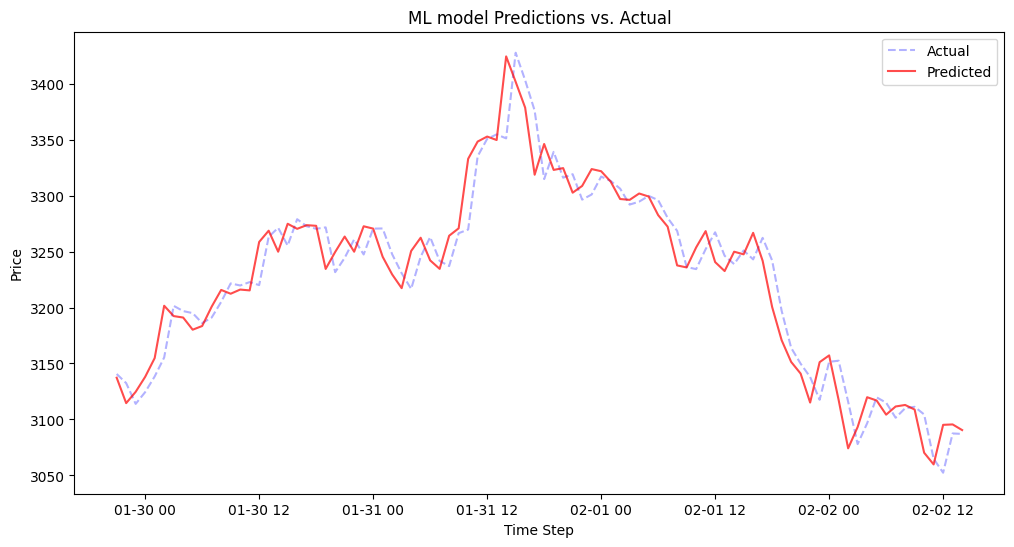

In [243]:
all_predictions = result['MLPredictions']
all_targets = result['close']
plot(all_predictions[-90:], all_targets[-90:], "ML model Predictions vs. Actual")

In [248]:
current_result = result.iloc[-1]
current_result

open              3087.47000
high              3101.92000
low               3082.23000
close             3087.07000
volume           25861.50240
MLPredictions     3090.49847
Name: 2025-02-02 14:00:00, dtype: float64